Step 1: Baseline Model — Logistic Regression

In [2]:
# Importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

import sys
import os
sys.path.append(os.path.abspath(".."))  # Adds the parent directory to sys.path

from src.model_saver import save_model

In [8]:
# Loading the train test sets
X_train = np.load("../data/X_train.npy")
X_test = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

In [9]:
# Training the model lr: logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Evaluate this model
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC AUC: 0.8151851851851852


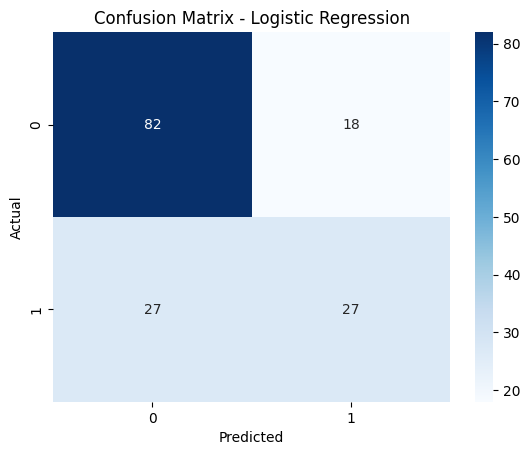

In [11]:
# Visualise Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [12]:
# Lets Get the entire Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



Insight: While the baseline performs reasonably well on non-diabetic predictions, it struggles with recall on diabetic cases. Let’s now see if Random Forest can do better.

Step 2: Baseline Model — Random Forest Classifier

In [13]:
# import and train the model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Predictions and Probabilities
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [15]:
#Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.7597402597402597
Precision: 0.6808510638297872
Recall: 0.5925925925925926
F1 Score: 0.6336633663366337
ROC AUC: 0.820925925925926


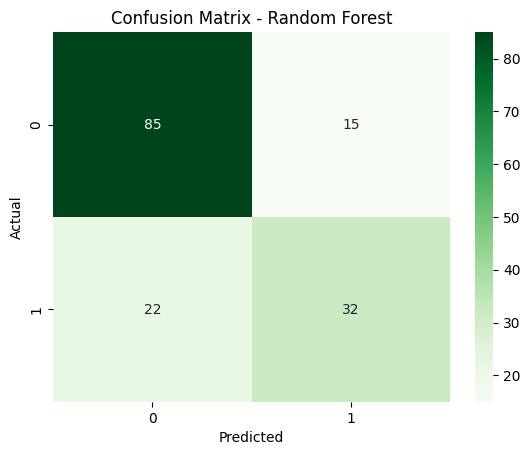

In [16]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [17]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



COMPARISION OF LOGISTIC REGRESSION AND RANDOM FOREST 
| Metric        | Logistic Regression  | Random Forest        |
| ------------- | -------------------- | -------------------- |
| Accuracy      | 0.71                 | **0.76** ✅           |
| Precision (1) | 0.60                 | **0.68** ✅           |
| Recall (1)    | 0.50                 | **0.59** ✅           |
| F1 Score (1)  | 0.55                 | **0.63** ✅           |
| ROC AUC       | *(add if available)* | *(add if available)* |



Interpretation:

Random Forest improved precision, recall, and F1 for diabetic cases (class 1).

It also shows a stronger balance between sensitivity and accuracy.

AS OF NOW, This model is currently your best candidate for deployment.





Step 3: XGBoost Classifier

In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:06:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
# Repeating the steps of Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [20]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

Accuracy: 0.7337662337662337
Precision: 0.6274509803921569
Recall: 0.5925925925925926
F1 Score: 0.6095238095238096
ROC AUC: 0.8096296296296296


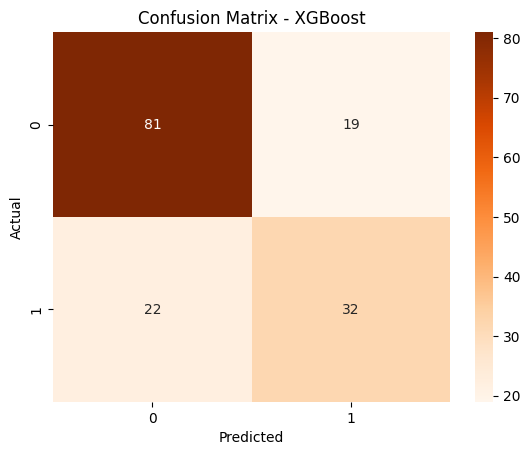

In [21]:
# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [22]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



Model Performance Summary (All 3 Models)


| Metric        | Logistic Regression          | Random Forest ✅       | XGBoost            |
| ------------- | ---------------------------- | --------------------- | ------------------ |
| Accuracy      | 0.71                         | **0.76** ✅            | 0.73               |
| Precision (1) | 0.60                         | **0.68** ✅            | 0.63               |
| Recall (1)    | 0.50                         | **0.59** ✅            | 0.59               |
| F1 Score (1)  | 0.55                         | **0.63** ✅            | 0.61               |
| ROC AUC       | *(add manually if you have)* | *(should be highest)* | *(likely similar)* |


In [23]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.71, 0.76, 0.73],
    "Precision": [0.60, 0.68, 0.63],
    "Recall": [0.50, 0.59, 0.59],
    "F1 Score": [0.55, 0.63, 0.61]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.71,0.60,0.50,0.55
1,Random Forest,0.76,0.68,0.59,0.63
2,XGBoost,0.73,0.63,0.59,0.61


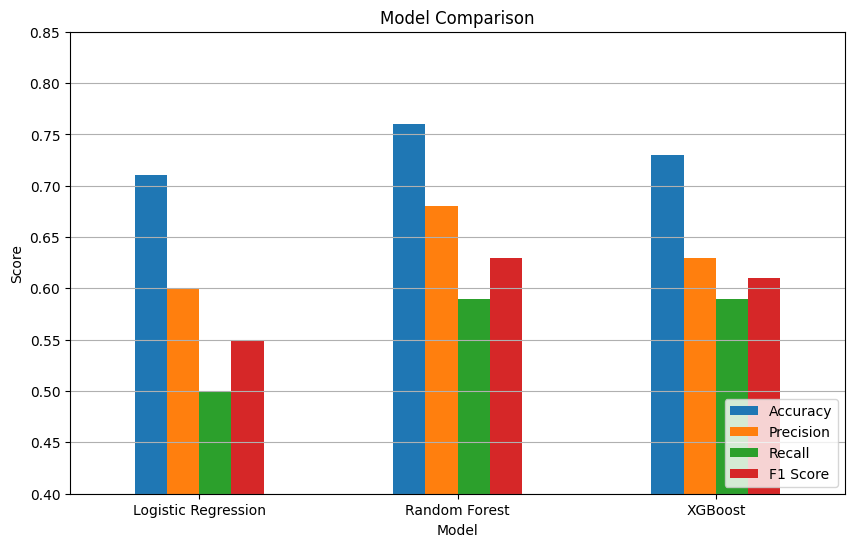

In [24]:
# Ploting this as a bar chart
comparison_df.set_index("Model").plot(kind="bar", figsize=(10, 6), ylim=(0.4, 0.85))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()


In [25]:
from src.model_saver import save_model
save_model(rf_model)

✅ Model is being saved to: ../models\rf_model.pkl
